## Assignment 2 - Machine Learning

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def str_to_day(str):
    """Returns amount of days passed since 18.12.03"""
    str = pd.to_datetime(str)
    return np.array([(str-nas.Date[0]).days]).reshape(-1,1)

In [3]:
# Loading .csv from github raw
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment2-machineLearning/NAS.csv'
nas = pd.read_csv(url)
print(f"dataframe shape = {nas.shape}")
nas.head(5)

dataframe shape = (4253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


## Feature engineering

In [4]:
# Identify number of NaN rows
nas.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [5]:
# Removing NaN rows
nas = nas.dropna(axis="rows")
nas.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Check dataframe
print(f"dataframe shape = {nas.shape}\ndatatype in ['Date'] = {type(nas['Date'][0])}")
nas.head()

dataframe shape = (4218, 7)
datatype in ['Date'] = <class 'str'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [7]:
# Reset the index and convert datatype in Date column from 'str' to 'datetime'
nas = nas.reset_index(drop=True) # 'drop = True' remove old index instead of it being added as a new column
nas['Date'] = pd.to_datetime(nas['Date'])
print(f"dataframe shape = {nas.shape}\ndatatype in ['Date'] column = {type(nas['Date'][0])}")
nas.head()

dataframe shape = (4218, 7)
datatype in ['Date'] column = <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [8]:
# Create a new column in dataframe with days passed since 2003-12-18
n = nas.shape[0]
delta_days = np.zeros((n,1))
for i in range(n):
    delta_days[i] = (nas.Date[i]-nas.Date[0]).days
nas['Days passed'] = delta_days.astype(int)
nas.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Days passed
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,1
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,4
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,5
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,11


## Train and Test Data

In [9]:
# Choosing input/feature and output/target for our models
x = nas['Days passed'].values.reshape(-1,1)
y = nas['Close'].values.reshape(-1,1)

In [10]:
# Split into 70% training and 30% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

## Linear Regression

In [11]:
# Create and train the linear model
lin = LinearRegression().fit(x_train, y_train)

In [22]:
# Accuracy of the model
y_lin_pred = lin.predict(x_test)

lin_rmse = np.sqrt(mean_squared_error(y_test,y_lin_pred))
lin_r2 = r2_score(y_test,y_lin_pred)

print(f"RMSE = {lin_rmse.round(2)}")
print(f"R2 = {lin_r2.round(2)}")

RMSE = 47.81
R2 = 0.23


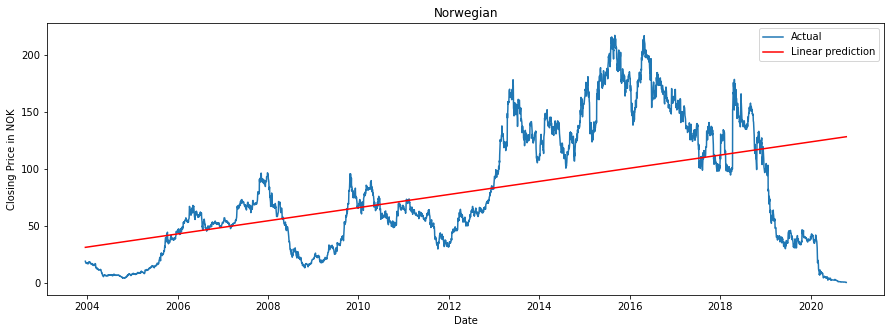

In [13]:
# Visualize the linear regression model
y_lin_pred = lin.predict(x)

plt.figure(figsize=(15,5))
plt.plot(nas.Date,nas.Close, label='Actual')
plt.plot(nas.Date,y_lin_pred, color = 'Red', label='Linear prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price in NOK')
plt.title('Norwegian')
plt.legend()
plt.show()

In [21]:
# Predict the future
str_date = '2021-12-18'
prediction = int(lin.predict(str_to_day(str_date)))

print(f"The linear regression model predicts that the closing stock price in {str_date} will be {prediction} NOK.")

The linear regression model predicts that the closing stock price in 2021-12-18 will be 134 NOK.


## Polynomial Regression

In [16]:
# Create and train the polynomial regression model
poly = PolynomialFeatures(degree = 8)
x_poly_train = poly.fit_transform(x_train)

poly.fit(x_poly_train, y_train)
lin2 = LinearRegression().fit(x_poly_train,y_train)

In [23]:
# Accuracy of the model
x_poly_test = poly.fit_transform(x_test)
y_poly_pred = lin2.predict(x_poly_test)

poly_rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
poly_r2 = r2_score(y_test,y_poly_pred)
print(f"RMSE = {poly_rmse.round(2)}")
print(f"R2 = {poly_r2.round(2)}")

RMSE = 23.85
R2 = 0.81


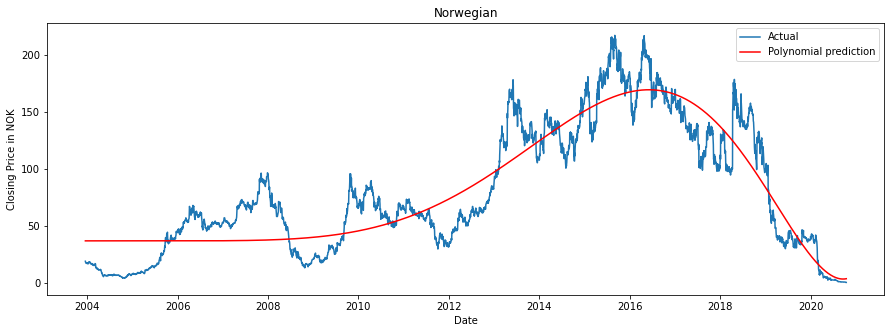

In [18]:
# Visualize the polynomial regression model
y_poly_pred = lin2.predict(poly.fit_transform(x))

plt.figure(figsize=(15,5))
plt.plot(nas.Date,nas.Close, label='Actual')
plt.plot(nas.Date,y_poly_pred,color = 'Red', label='Polynomial prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price in NOK')
plt.title('Norwegian')
plt.legend()
plt.show()

In [20]:
# Predict the future
str_date = '2021-12-18'
prediction = int(lin2.predict(poly.fit_transform(str_to_day(str_date))))

print(f"The linear regression model predicts that the closing stock price in {str_date} will be {prediction} NOK.")

The linear regression model predicts that the closing stock price in 2021-12-18 will be 127 NOK.
